In [12]:
%matplotlib inline 
import experiment as ex
from network_generation import generation as ng
import matplotlib.pyplot as plt
import numpy as np
import pickle 
from scipy import stats 

## compute error of the CV

In [35]:
def compute_CV(data):
    
    n = float(len(data))
    
    # compute nth sample moment
    mu4 = stats.moment(data,moment=4)
    mu2 =  stats.moment(data,moment=2)
    var = np.var(data)

    # the fourth population moment estimator 
    D4 = ((n-1)/(n**3))*((n**2 - 3*n + 3)*mu4 + 3*(2*n - 3)*(mu2**2))

    # the estimate of the variance standard error 
    Var_SE = np.sqrt((1/(n))*(D4 - ((n-3)/(n-1))*(var**2)))
    
    # normal approximation 
    # Var_SEn = np.var(data)*np.sqrt(2/((float(n))-1))

    CV = ( np.var(data)**0.5 ) / ( np.mean(data) ) 

    part1 = (Var_SE/(  2.0*(np.var(data)**0.5)*np.mean(data) ) )**2 
    part2 = (  (  ((np.var(data))**0.5)*stats.sem(data)/(np.mean(data)**2)  )  )**2
    CV_SE = np.sqrt( part1  +  part2 )  

    return CV, CV_SE   

## setup

In [31]:
# kappa_range = [1,3,5,8,10,15,20]
kappa_range = [10]
boundary = 's'
d_range = [2,3,6,9,15,25]
n = 1000

# MODEL
def f(B, x):
    return np.exp(B[0]*x)

## ER

In [13]:
# GENERATE ER DATA 
kappa_range = [1,3,5,8,10,15,20]
n_range = [1000]
num_samples = 100
print 'running ' + str(len(n_range)*len(kappa_range)) + ' generations'
i=1
for kappa in kappa_range:
    for n in n_range:
        # make an ER Ensemble
        ER = ng.EREnsemble(kappa,n)
        # generate samples 
        # sample data is stored in the object 
        ER.generate_samples(n=num_samples)
        # data to disk 
        ER.to_disk()
        print 'saved run ' + str(i)
        i+=1 

running 7 generations
saved run 1
saved run 2
saved run 3
saved run 4
saved run 5
saved run 6
saved run 7


In [14]:
# ER data 
ERE = ex.ERExperiment(kappa_range, n)
ERE.to_LCC()

nD_list = ERE.ensembles[0].find_nD_list()

CV_ER, CV_ER_SE = compute_CV(nD_list)
print CV_ER, CV_ER_SE

10


## solid

In [ ]:
# RGG data 
nD_lists_RGG = []
for d in d_range:
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
    RGG.to_LCC()
    nD_lists_RGG.append(RGG.ensembles[0].find_nD_list())
    print "d = " + str(d) + ' done'

In [ ]:
CVs = []
CV_SEs = []
for nD_list in nD_lists_RGG:
    c, s = compute_CV(nD_list)
    CVs.append(c)
    CV_SEs.append(s)

## periodic

In [ ]:
boundary = 'p'

# RGG data 
nD_lists_RGG = []
for d in d_range:
    RGG = ex.RGGExperiment(kappa_range, n, d, shortcut_prob=0, boundary=boundary, num_radii=10)
    RGG.to_LCC()
    nD_lists_RGG.append(RGG.ensembles[0].find_nD_list())
    print "d = " + str(d) + ' done'

In [33]:
CVsp = []
CV_SEsp = []
for nD_list in nD_lists_RGG:
    c, s = compute_CV(nD_list)
    CVsp.append(c)
    CV_SEsp.append(s)

## plot

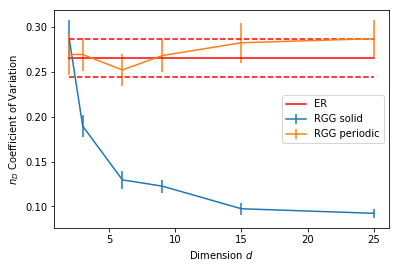

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(d_range,[CV_ER*o for o in np.ones(len(d_range))],'r',label='ER')
ax.plot(d_range,[CV_ER*o - CV_ER_SE for o in np.ones(len(d_range))],'r--')
ax.plot(d_range,[CV_ER*o + CV_ER_SE for o in np.ones(len(d_range))],'r--')
ax.set_xlabel('Dimension $d$')
ax.set_ylabel('$n_D$ Coefficient of Variation')
ax.errorbar(d_range,CVs,yerr=CV_SEs,label='RGG solid')
ax.errorbar(d_range,CVsp,yerr=CV_SEsp,label='RGG periodic')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)
fig.savefig('./plots/CV_kappa_10.eps')